# Linear Regression Assignment

Reading and Understanding the Data

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the csv file
bikeSharing_df = pd.read_csv('day.csv')

In [3]:
#check dataframe datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bikeSharing_df.shape

(730, 16)

### Data Cleaning and Data Visualization

In [6]:
# dropping the duplicates

bikeSharing_df.drop_duplicates(inplace=True)

In [7]:
bikeSharing_df.shape

(730, 16)

In [8]:
# dropping the unwanted columns

bikeSharing_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


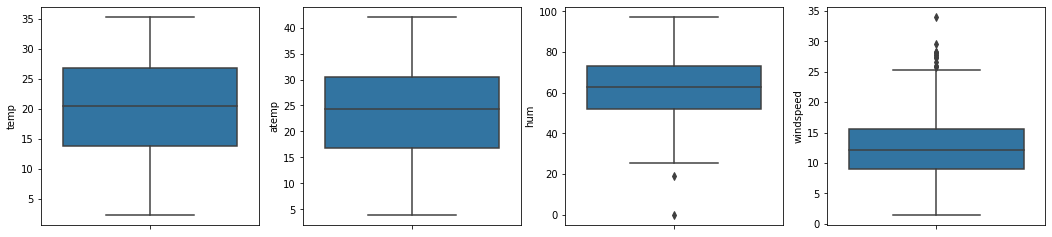

In [10]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

In [11]:
#changing categorical data which were primarily numeric to more meaningful one
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


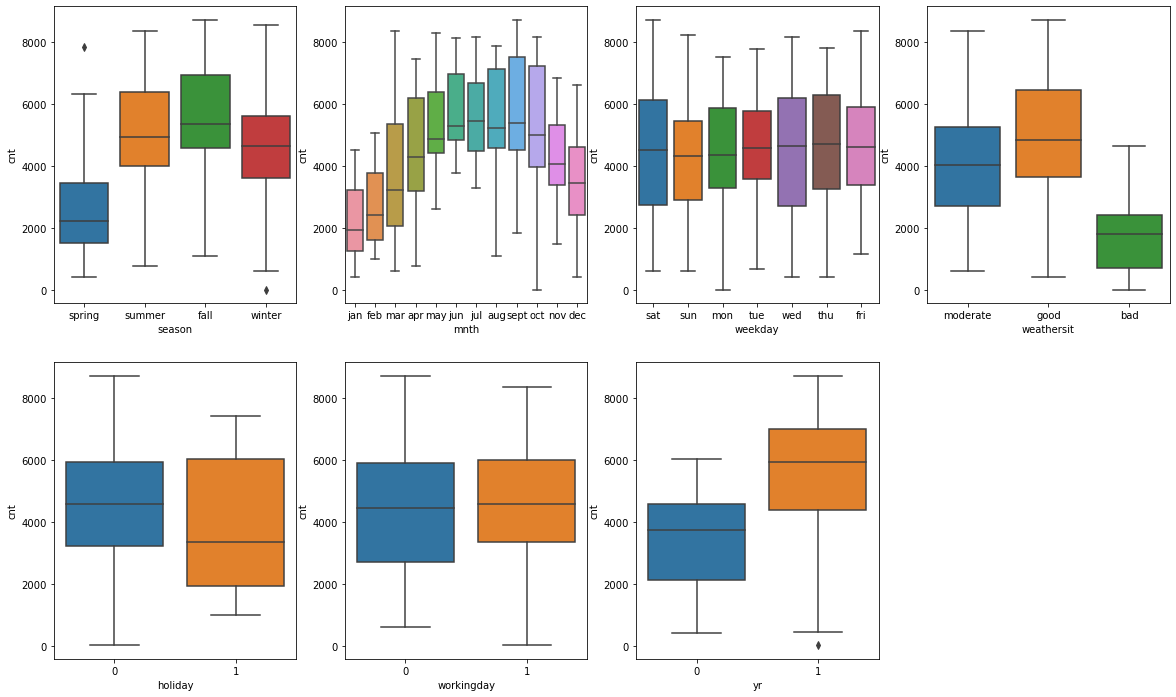

In [12]:
# Analysing/visualizing the categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing_df)
plt.show()

<Figure size 1080x2160 with 0 Axes>

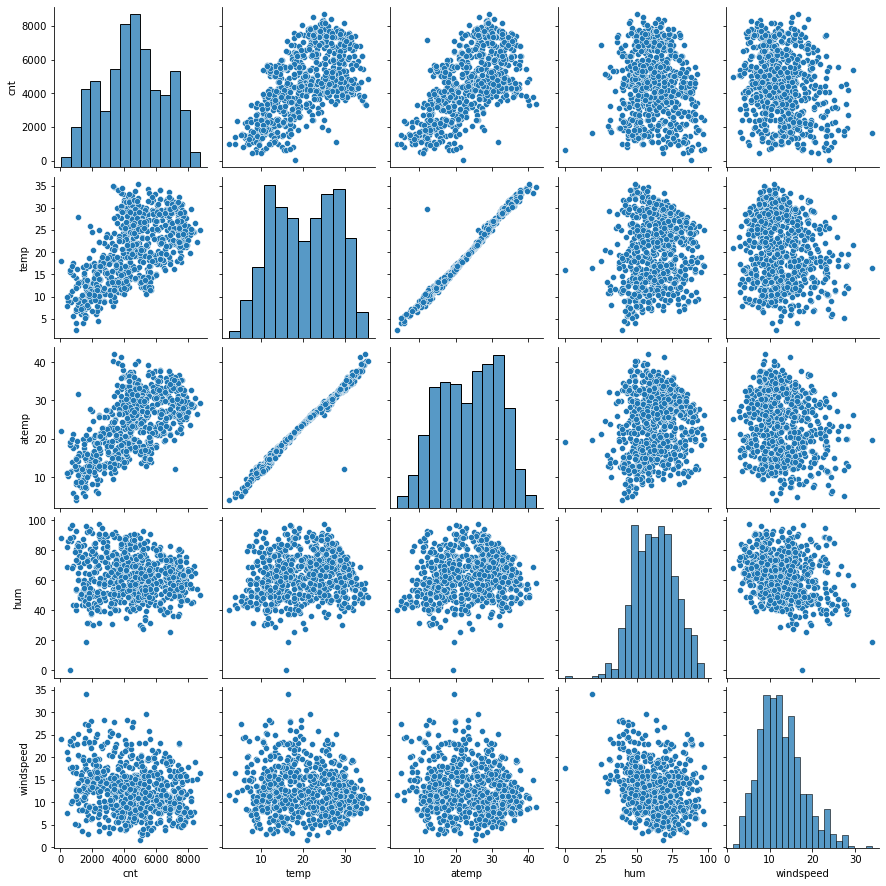

In [13]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# Heatmap for correlation between numeric variables

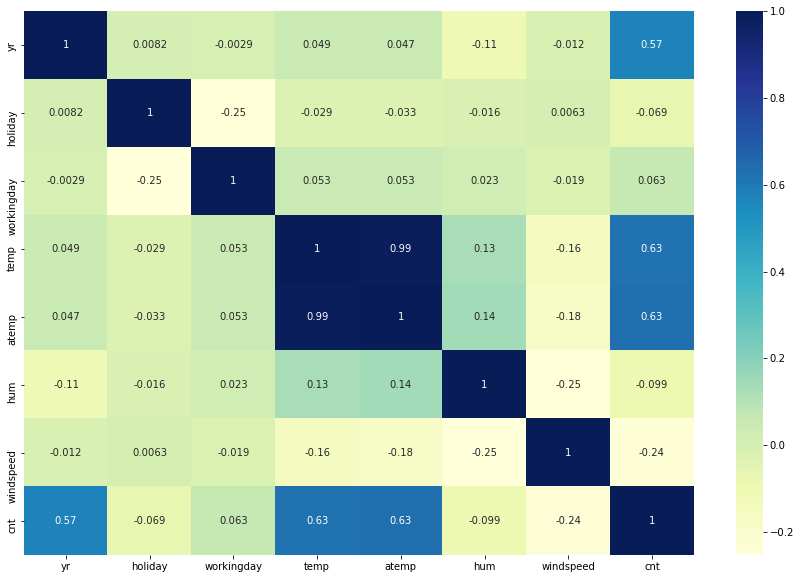

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(bikeSharing_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [15]:
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Dummy Variables

Dummy variable creation for season, mnth, weekday and weathersit

In [16]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

In [17]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


### Splitting the Data into Training and Testing Sets

In [18]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing_df, train_size = 0.7, random_state = 100)

y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test

In [20]:
print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


In [21]:
scaler = MinMaxScaler()

In [22]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
num_vars = ['temp','atemp','hum','windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

### Build model using RFE

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


In [28]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [29]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [30]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [31]:
get_vif(col)

               Features    VIF
13      weathersit_good  51.51
14  weathersit_moderate  34.35
6         season_spring   5.02
12       weathersit_bad   4.41
3                  temp   3.62
8         season_winter   3.49
7         season_summer   2.62
4                   hum   1.91
2            workingday   1.88
11          weekday_sat   1.78
9              mnth_jul   1.49
10            mnth_sept   1.30
5             windspeed   1.20
1               holiday   1.16
0                    yr   1.03


In [32]:
X_train.shape

(510, 30)

### Model 1

In [33]:
#Selected columns for Model 1 - all columns selected by RFE
cols1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols1)
get_vif(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        14:05:22   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2211.4527    

### Model 2

In [34]:
# Dropping the variable mnth_jan as it has high p-value
cols2 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols2)
get_vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.11e-191
Time:                        14:05:22   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2109.4938    

### Model 3

In [35]:
# Dropping the variable hum as it has high VIF
cols3 = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols3) 
get_vif(cols3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        14:05:22   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1391.5045    

### Model 4

In [36]:
# Dropping the variable temp as it has high VIF
cols4 = ['yr','holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols4) 
get_vif(cols4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.68e-149
Time:                        14:05:22   Log-Likelihood:                -4213.2
No. Observations:                 510   AIC:                             8452.
Df Residuals:                     497   BIC:                             8508.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4730.7650    

### Model 5

In [37]:
# Dropping the variable windspeed as it has high VIF
cols5 = ['yr','holiday', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols5) 
get_vif(cols5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.14e-143
Time:                        14:05:22   Log-Likelihood:                -4229.7
No. Observations:                 510   AIC:                             8483.
Df Residuals:                     498   BIC:                             8534.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4325.5389    

### Model 6

In [38]:
# Dropping the variable mnth_jul as it has high p-value
cols6 = ['yr','holiday', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols6) 
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          9.78e-145
Time:                        14:05:22   Log-Likelihood:                -4229.8
No. Observations:                 510   AIC:                             8482.
Df Residuals:                     499   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4294.4984    

### Model 7

In [39]:
# Dropping the variable holiday as it has high p-value
cols7 =  ['yr', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols7) 
get_vif(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     168.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.86e-145
Time:                        14:05:22   Log-Likelihood:                -4231.5
No. Observations:                 510   AIC:                             8483.
Df Residuals:                     500   BIC:                             8525.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4220.0182    

#### We can consider the above model as the p value is almost 0. Also the VIF is of acceptable range for all the vaiables and the R2 is 0.75

In [40]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [41]:
#Let us build the final model using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols7],y_train)
print(lr.intercept_,lr.coef_)

4220.018196637197 [ 2143.89812398   500.29458113 -2736.32175363  -475.5049128
  -676.89957999   668.3286995    532.17194127 -2760.0884808
  -773.25792143]


### Residual Analysis

In [42]:
y_train_pred = lr.predict(X_train[cols7])

In [43]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

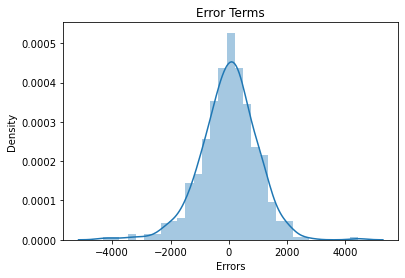

In [44]:
plot_res_dist(y_train, y_train_pred)

In [45]:
cols7 = ['yr', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols7])

r2_score(y_test,y_test_pred)

0.7541275039059465

In [47]:
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.7541275039059465

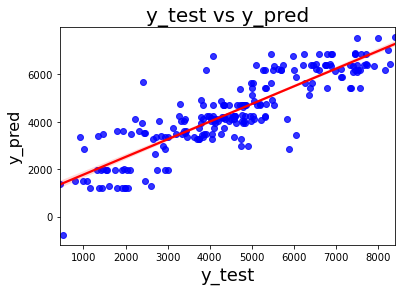

In [48]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

- Train R squared value      : 0.752
- Test R squared value       : 0.754

In [49]:
#Let us rebuild the final model
cols7 = ['yr', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

lm = build_model(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     168.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.86e-145
Time:                        14:06:52   Log-Likelihood:                -4231.5
No. Observations:                 510   AIC:                             8483.
Df Residuals:                     500   BIC:                             8525.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4220.0182    

### Conclusion:


Demand of bikes depend on 
* year
* workingday
* season
* mnth
* weathersit
* weekday